<a href="https://colab.research.google.com/github/Rithigasri/basic-nn-model/blob/main/DL_EXP01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd

auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

worksheet = gc.open('DL').sheet1

rows = worksheet.get_all_values()
df = pd.DataFrame(rows[1:], columns=rows[0])
df=df.astype({'INPUT':'float'})
df=df.astype({'OUTPUT':'float'})
df.head()

,INPUT,OUTPUT
0,1.0,13.0
1,2.0,15.0
2,3.0,17.0
3,4.0,19.0
4,5.0,21.0


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
X = df[['INPUT']].values
y = df[['OUTPUT']].values


In [4]:
X

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.],
       [20.]])

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 33)
Scaler = MinMaxScaler()
Scaler.fit(X_train)

MinMaxScaler()

In [6]:
X_train1 = Scaler.transform(X_train)

In [7]:
model=Sequential([
    #Hidden ReLU Layers
    Dense(units=5,activation='relu',input_shape=[1]),
    Dense(units=3,activation='relu'),
    #Linear Output Layer
    Dense(units=1)
])

In [8]:
model.compile(optimizer='rmsprop',loss='mse')

In [13]:
model.fit(X_train1,y_train,epochs=3000)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 8ms/step - loss: 142.1016
Epoch 502/3000
1/1 [==============================] - 0s 9ms/step - loss: 141.3926
Epoch 503/3000
1/1 [==============================] - 0s 10ms/step - loss: 140.6852
Epoch 504/3000
1/1 [==============================] - 0s 9ms/step - loss: 139.9793
Epoch 505/3000
1/1 [==============================] - 0s 10ms/step - loss: 139.2749
Epoch 506/3000
1/1 [==============================] - 0s 9ms/step - loss: 138.5721
Epoch 507/3000
1/1 [==============================] - 0s 10ms/step - loss: 137.8707
Epoch 508/3000
1/1 [==============================] - 0s 9ms/step - loss: 137.1710
Epoch 509/3000
1/1 [==============================] - 0s 9ms/step - loss: 136.4728
Epoch 510/3000
1/1 [==============================] - 0s 9ms/step - loss: 135.7761
Epoch 511/3000
1/1 [==============================] - 0s 9ms/step - loss: 135.0810
Epoch 512/3000
1/1 [============================

<Axes: >

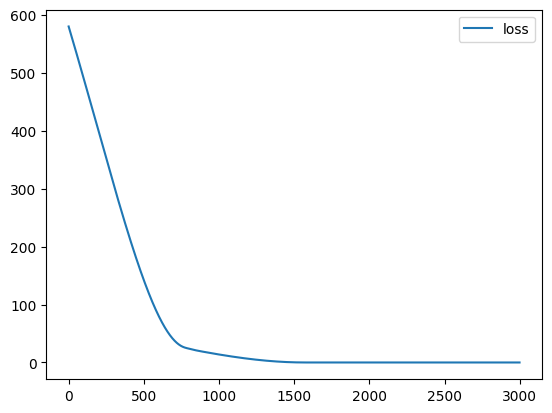

In [14]:
loss= pd.DataFrame(model.history.history)
loss.plot()

In [15]:
X_test1 =Scaler.transform(X_test)
model.evaluate(X_test1,y_test)


1/1 [==============================] - 0s 21ms/step - loss: 6.4177e-04


0.0006417661788873374

In [16]:
X_n1=[[4]]
X_n1_1=Scaler.transform(X_n1)
model.predict(X_n1_1)

1/1 [==============================] - 0s 18ms/step


array([[18.984268]], dtype=float32)